# Case Study 4.1 - Movies

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

# BEGINNER PYTHON

As this is a beginner version, we include a lot of code here to help you along the way.

# Identification Information

In [1]:
# YOUR NAME              = Julio Villane
# YOUR MITX PRO USERNAME = jvillane
# YOUR MITX PRO E-MAIL   = jvillane@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [2]:
!pip install surprise==0.1

  Using cached https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 3.3MB 191kB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

# Import

Import the required tools into the notebook.

In [3]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
print('Imports successful!')

Imports successful!


In [4]:
%matplotlib inline

# Data

Load the MovieLens data. A dialog may pop up saying **"Dataset ml-100k could not be found. Do you want to download it? [Y/n]"** Type Y and hit Enter to start the download process.

In [5]:
data = Dataset.load_builtin('ml-100k')
print('Data load successful!')

Data load successful!


We also want to get a sense of what the data looks like. Let's create a histogram of all the ratings we have in the dataset.

Histogram generation successful!


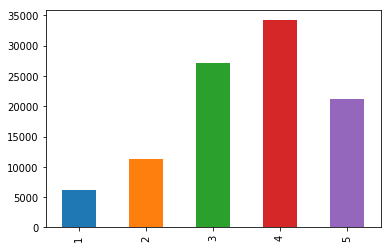

In [6]:
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Get the rating column
ratings = raw_data.rating

# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.bar()

print('Histogram generation successful!')

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

Number of ratings per user...


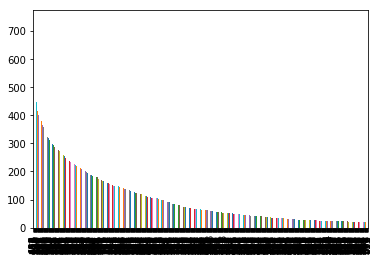

In [15]:
user_ids = raw_data.user_id
print('Number of ratings per user...')
user_ids.value_counts().plot(kind='bar', label='Number of ratings per user')

Number of ratings per movie...


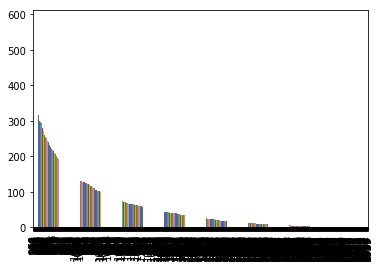

In [16]:
item_ids = raw_data.item_id
print('Number of ratings per movie...')
item_ids.value_counts().plot(kind='bar', label='Number of ratings per movie')

There size of the dataset is 100.000.
As you can see in the 'Number of ratings per user' graph, some users rated a large amount of movies (more than 400 in some cases) and, in the other hand, other users rated less than 10 movies.
Something similar happen in the 'Number of ratings per movie' graph, some movies were rated by a lot of users (more than 300 in some cases) and, in the other hand, other movies were rated less than 10 times.
Both graphs are visually consistent with poisson distribution or exponential distribution

# Model 1: Random

In [17]:
# Create model object
model_random = NormalPredictor()
print('Model creation successful!')

Model creation successful!


In [18]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5145  1.5302  1.5173  1.5251  1.5213  1.5217  0.0056  
Fit time          0.75    0.90    0.99    0.93    0.82    0.88    0.08    
Test time         1.08    1.00    1.00    0.95    0.92    0.99    0.05    
Model training successful!


# Model 2: User-Based Collaborative Filtering

In [19]:
# Create model object
model_user = KNNBasic(sim_options={'user_based': True})
print('Model creation successful!')

Model creation successful!


In [20]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9752  0.9830  0.9828  0.9820  0.9780  0.9802  0.0031  
Fit time          1.92    2.10    2.14    2.18    2.15    2.10    0.09    
Test time         23.44   24.36   23.12   22.11   22.73   23.15   0.75    
Model training successful!


# Model 3: Item-Based Collaborative Filtering

In [21]:
# Create model object
model_item = KNNBasic(sim_options={'user_based': False})
print('Model creation successful!')

Model creation successful!


In [22]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9755  0.9681  0.9737  0.9809  0.9713  0.9739  0.0043  
Fit time          3.07    3.35    3.45    3.42    3.43    3.35    0.14    
Test time         26.12   25.61   27.55   25.96   26.06   26.26   0.67    
Model training successful!


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

Considering the RMSE mean results of each model with the same data, the User-Based and Item-Based Collaborative Filtering models had a better fit than the baseline Random Model, so both models (2 and 3) are better response predictors than a random one.

If we analize the User-Based with Item-Based Collaborative Filtering models, there is a little difference between their corresponding RMSE mean (0.9802 and 0.9739 respectively). So, it's reasonable to affirm that the Item-Based Collaborative Filtering model works better than the User-Based Collaborative Filtering model.

Maybe, the main reason that explains the better fit for the Item-Based Collaborative Filtering model, is that there is an easier way of calculate similarity between items rather than users, because when the movie is popular that induce that a lot of users rated it, and those movies (the popular ones) are the ones that really matter.

--- The item based personalization is much more predictive than the user based ones. For exactly the reason that we mentioned before. The movies that really matter have a lot of ratings.

# Model 4: Matrix Factorization

In [23]:
# Create model object
model_matrix = SVD()
print('Model creation successful!')

Model creation successful!


In [24]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may take some time (2-3 minutes) to train, so please be patient
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9279  0.9373  0.9330  0.9343  0.9391  0.9343  0.0039  
Fit time          30.55   31.76   29.66   30.74   31.80   30.90   0.80    
Test time         1.18    1.01    3.29    1.15    1.12    1.55    0.87    
Model training successful!


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

The Collaborative Filtering Models consider that exists a relation (or similarity) between the users (rows) or the items (columns). In the case of the users, it's reasonably to assume that some groups of users share the same preferences for different groups of movies (love, action, drama, etc)... they are correlated. With that in mind, use that information to predict a rating based on how well that user is represented by a defined group of users with their rating values. Something similar happens with movies.

On the other hand, Matrix Factorization models extracts the relation between rows and columns at the same time by defining a group of features that will be used to represent those relations, so it's reasonable that the predictions made by this model would be better than the predictions made by the previously mentioned Collaborative Filter models (mean RMSE of 0.9343).

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k). **Make sure you run this cell.**

In [25]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('Function creation successful!')

Function creation successful!


Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

Precision/Recall Table
![recall_precision.png](attachment:recall_precision.png)

As you can appreciate on the table results, as expected the Random Model is the worst performed model, so I won't analyze those values.

On the other hand, we can note from the results that the User based model has consistently better Recall than the other models, and the Item based model has consistenly better Precision than the other models. These results are not 

Computing the F1 Score we obtain the following values:
![f1_score.png](attachment:f1_score.png)

In the table we can appreciate something different from the RMSE results, in this case, the best performed model is the User-based model, followed by the Matrix Factorization

In [26]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))
        print('\n')

print('Precision and recall computation successful!')

>>> k=5, model=NormalPredictor
>>> precision: 0.588
>>> reccall  : 0.338


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.764
>>> reccall  : 0.457


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.82
>>> reccall  : 0.392


>>> k=5, model=SVD
>>> precision: 0.783
>>> reccall  : 0.433

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [57]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Function creation successful!')

Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

In [27]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('Trainset and testset creation successful!')

Trainset and testset creation successful!


<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

*Type your response here...*

In [ ]:
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

print('Top N computation successful!')

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.